# Introduction

**Making sure you can run PyTorch code**

In our first practical session, we will learn the basics of how to train, test and use simple multilayered perceptron networks.

But first we need to verify that we are able to run pyTorch code. you can execute the code blocks as the one below by clicking shift+Enter


In [ ]:
if 'google.colab' in str(get_ipython()):
  print('Running in Google colab, no need to install libraries')
else:
  print('Download the requirements.txt file from the course Web site in order to automatically install required libraries on a local machine via pip')

Running in Google colab, no need to install libraries


If you ran the above code snippet, you should see that you are either in google colab, or in some other environment.

In [ ]:
import torch

print(f'pytorch version: {torch.__version__}')

num_gpu = torch.cuda.device_count()
print(f'{num_gpu} GPU available')

pytorch version: 2.1.0+cu121
1 GPU available


If the above code has printed 0 GPU available, please make sure you switched to the T4 GPU capable runtime (top right corner of the page), or else, the exercises will be very slow...

Once you are running a runtime with GPU, you can also run a shell command nvidia-smi, to check on the status of your GPU

In [ ]:
!nvidia-smi


Tue Feb 20 18:01:11 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

#Example 1 - Simple linear regression task

Now that everything is up a running, let us check one of the simplest tasks, a neural network can perform - a linear regression. I.e. we will generate some data that will correspond to an approximate linear function and we will try to train a model that realizes this function.

First, let us generate some data.

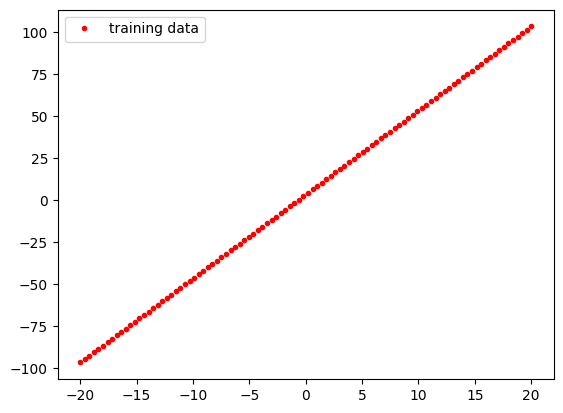

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Xs = np.linspace(-20,20,100) # we start with a hundered X values between -20 and 20

Ys=Xs*5+3.5 # as our Xs are a numpy array, we can perform simple arithmetic on each element of Xs

#Now, we can plot the data we generated

plt.plot(Xs,Ys,"r.",label="training data")
plt.legend()

Now we need to define the model. We will go with a very simple network, with one input, one output, and a hidden layer with 4 neurons.



In [ ]:

import torch.nn as nn

#we set the parameters of our simple network architecture
N_input=1
N_hidden=54
N_output=1

#create the model based on these parameters
model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.Linear(N_hidden, N_output),
)

#convert our numpy arrays Xs and Ys into torch vectors we can use in training

inputs = torch.tensor(Xs.reshape((100,1)), dtype=torch.float32)
targets = torch.tensor(Ys.reshape((100,1)), dtype=torch.float32)


Now that we have the data and the model, we need to specify the optimizer and a loss function. As this is a regression task, we will use the MSE (MeanSquareError) loss function and a simple SGD(stochastic gradient descent optimizer).

In [ ]:
criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Stochastic Gradient Descent in this case)
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001) # lr is the learning rate


Finally, we need to set up the main training loop.

In [ ]:
N_epochs=3000
loss_vals=[]
# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)
    if epoch % 300 == 0:
        print('epoch: ', epoch, ' loss: ', loss.item())
        loss_vals.append(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()


epoch:  0  loss:  2873.89404296875
epoch:  300  loss:  1.5464931726455688
epoch:  600  loss:  0.13664430379867554
epoch:  900  loss:  0.011696901172399521
epoch:  1200  loss:  0.0009909129003062844
epoch:  1500  loss:  8.366432302864268e-05
epoch:  1800  loss:  7.072225344018079e-06
epoch:  2100  loss:  5.950020067757578e-07
epoch:  2400  loss:  5.425994586971683e-08
epoch:  2700  loss:  5.4696416285082705e-09


After training, we can also plot the evolution of the loss function value over the training period

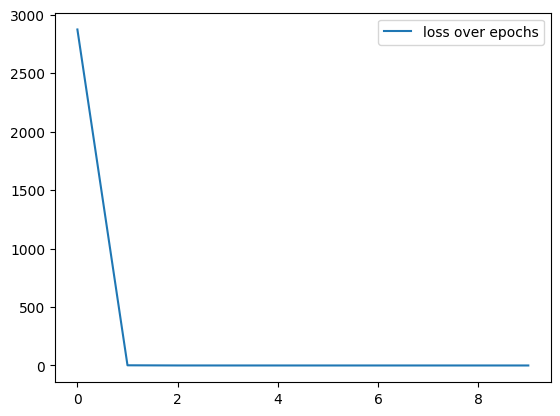

In [ ]:
plt.plot(loss_vals,label="loss over epochs")
plt.legend()

Now that we have trained our model, we can see how it can be used on some new testing data. We will generate a few points inside the interval that the network was trained on and a few samples outside, to see if the network generalizes.

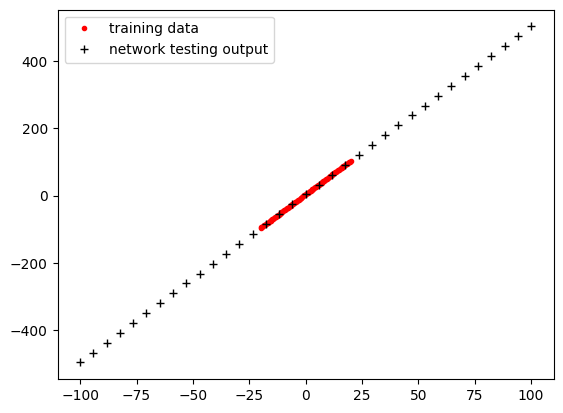

In [ ]:
test_Xs= np.linspace(-100,100,35)
test_Ys=test_Xs*5+3.5

with torch.no_grad(): # turning of the autograd of PyTorch
    test_data = torch.tensor(test_Xs.reshape((35,1)), dtype=torch.float32)
    test_output = model(test_data)

#plot the results
plt.plot(Xs,Ys,"r.",label="training data")
plt.plot(test_Xs,test_output,"k+",label="network testing output")
plt.legend()

As we can see, the model is generalizing properly from the training data we have provided it with.


# Example 2 - non-linear function of 2 arguments

Now that we have the first working neural network model, we can move to something a little more realistic. A non-linear function of two arguments. Let's try with:

Y = x2 ** 2 * 5 - x1 * 3 + 15

torch.Size([2500, 2])

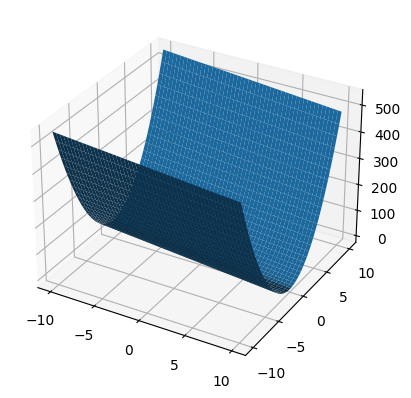

In [ ]:
Xs1 = np.linspace(-10,10,50)
Xs2 = np.linspace(-10,10,50)

Xs1,Xs2 = np.meshgrid(Xs1,Xs2) # generate all possible pairs of x1 and x2

Ys = (Xs2**2*5)-(Xs1*3) + 15

# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(Xs1, Xs2, Ys, vmin=Ys.min() * 2)

#preparing torch tensors for learning

inputs = torch.tensor(np.concatenate((Xs1.reshape((2500,1)),Xs2.reshape((2500,1))),axis=1), dtype=torch.float32)
targets = torch.tensor(Ys.reshape((2500,1)), dtype=torch.float32)

inputs.shape
#targets.shape

This function is non-linear and has multiple arguments, let us create a model with non-linear activation function (We'll use ReLU for that), two hidden layers instead of one and we will use Adam optimizer to speed up the process.

In [ ]:
#model definition
N_input=2
N_hidden=25
N_output=1

#we will now have more hidden layers and more neurons in each of them

model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.ReLU(),                       # we need non-linear activation functions
    nn.Linear(N_hidden, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_output),
    nn.ReLU()
)

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate


Again, a very similar training loop, with just a bit more iterations:

In [ ]:

N_epochs=50000
loss_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)
    if epoch % 2000 == 0:                              #we will print fewer loss values
        print('epoch: ', epoch, ' loss: ', loss.item())
        loss_vals.append(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()


epoch:  0  loss:  59877.01953125
epoch:  2000  loss:  64.19805908203125
epoch:  4000  loss:  3.506793260574341
epoch:  6000  loss:  2.54937481880188
epoch:  8000  loss:  2.2113735675811768
epoch:  10000  loss:  2.089993476867676
epoch:  12000  loss:  2.0286715030670166
epoch:  14000  loss:  1.967468500137329
epoch:  16000  loss:  1.9144015312194824
epoch:  18000  loss:  1.890034794807434
epoch:  20000  loss:  1.871954083442688
epoch:  22000  loss:  1.856847882270813
epoch:  24000  loss:  1.8374249935150146
epoch:  26000  loss:  1.8306435346603394
epoch:  28000  loss:  1.8203099966049194
epoch:  30000  loss:  1.8167939186096191
epoch:  32000  loss:  1.7963999509811401
epoch:  34000  loss:  1.792462706565857
epoch:  36000  loss:  1.7895019054412842
epoch:  38000  loss:  1.786828875541687
epoch:  40000  loss:  1.7846566438674927
epoch:  42000  loss:  1.7868682146072388
epoch:  44000  loss:  1.7859318256378174
epoch:  46000  loss:  1.7772316932678223
epoch:  48000  loss:  1.776480913162231

The optimizer learns very fast the first few steps and then slows down. Again we can plot the loss function improvement over *time*

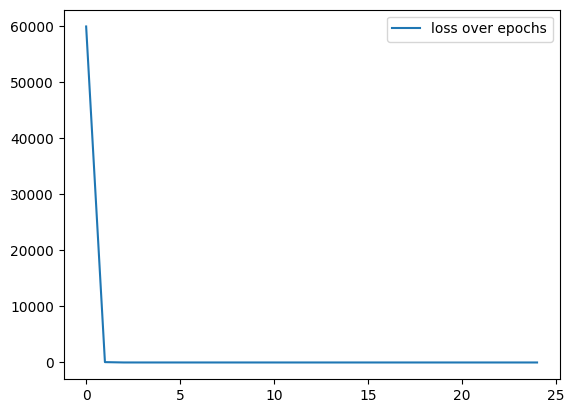

In [ ]:
    plt.plot(range(len(loss_vals)),loss_vals,label="loss over epochs")
    plt.legend()

Again, we need to test if the function we have learned is generalizing beyond the training range:

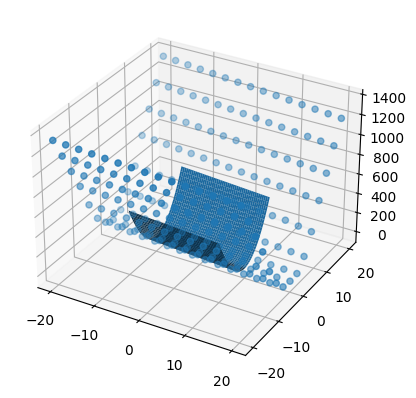

In [ ]:
test_Xs1 = np.linspace(-20,20,15)
test_Xs2 = np.linspace(-20,20,15)

test_Xs1,test_Xs2 = np.meshgrid(test_Xs1,test_Xs2)

with torch.no_grad():
    test_data = torch.tensor(np.concatenate((test_Xs1.reshape((225,1)),test_Xs2.reshape((225,1))),axis=1), dtype=torch.float32)
    test_output = model(test_data)

test_mesh_output=test_output.reshape((15,15))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(Xs1, Xs2, Ys,label="training data")
ax.scatter(test_Xs1,test_Xs2,test_mesh_output,label="testing data")



We have now seen two examples, where it was relatively easy for pytorch to fit the training data and generalize beyond it in the expected manner. Let us now see some situations, where this might not be so easy.

# Example 3 - XOR-like function


Let us first see how the underfitting looks like, based on the famous example of a non linear function similar to XOR. Let us consider a python function


```
def XOR_like(x1,x2):
    if (x1>=1 and x2<=1) or (x2>=1 and x1<=1):
        return 1
    else:
        return 0
```

Can we train a single perceptron to learn it? This time, we will use some random data points instead of the regular mesh.

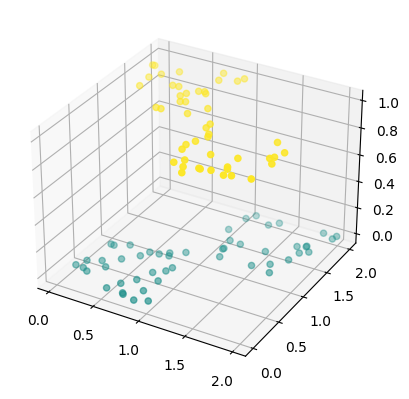

In [ ]:
# let us start with some random X1,X2 point pairs from 0,2 interval
N_samples=100
train_X1s=np.random.rand(N_samples)*2
train_X2s=np.random.rand(N_samples)*2

def XOR_like(x1,x2):
    if (x1>=1 and x2<=1) or (x2>=1 and x1<=1):
        return 1
    else:
        return 0
train_Ys=np.array([XOR_like(x1,x2) for x1,x2 in zip(train_X1s,train_X2s)])

#prepare input and output data
inputs = torch.tensor(np.concatenate((train_X1s.reshape((N_samples,1)),train_X2s.reshape((N_samples,1))),axis=1), dtype=torch.float32)
targets = torch.tensor(train_Ys.reshape((N_samples,1)), dtype=torch.float32)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(train_X1s, train_X2s, train_Ys,label="training data",vmin=-1,c=train_Ys) #data is colored by the Y value


As we have heard in the lecture, this function should be difficult for a simple 1-layer perceptron model. Let us test if this indeed is true. First we need to define the model:

In [ ]:

#model definition
N_input=2
N_output=1

#This is the simplest network so far, just a simple perceptron

model = nn.Sequential(
    nn.Linear(N_input, N_output),
    nn.ReLU(),                       # we need non-linear activation functions
    )

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate


Once we have the model, we can try and train it:

In [ ]:
N_epochs=5000
loss_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)
    if epoch % 500 == 0:                              #we will print fewer loss values
        print('epoch: ', epoch, ' loss: ', loss.item())
        loss_vals.append(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()

epoch:  0  loss:  0.38106146454811096
epoch:  500  loss:  0.2528170049190521
epoch:  1000  loss:  0.2495804727077484
epoch:  1500  loss:  0.2489214688539505
epoch:  2000  loss:  0.24886664748191833
epoch:  2500  loss:  0.2488650530576706
epoch:  3000  loss:  0.2488650381565094
epoch:  3500  loss:  0.2488650381565094
epoch:  4000  loss:  0.248865008354187
epoch:  4500  loss:  0.248865008354187


The loss function gets lower, but never quite reaches 0. let us see if this is indeed a problem or not.

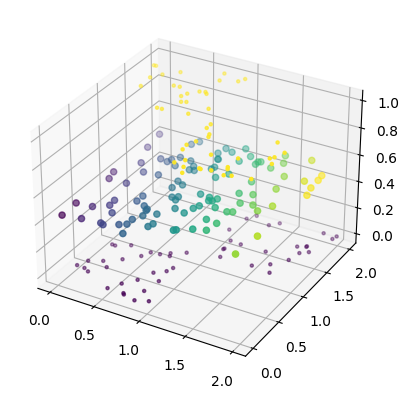

In [ ]:
N_samples=100
test_X1s=np.random.rand(N_samples)*2
test_X2s=np.random.rand(N_samples)*2

test_Ys=np.array([XOR_like(x1,x2) for x1,x2 in zip(test_X1s,test_X2s)])

#prepare test input  data
test_inputs = torch.tensor(np.concatenate((test_X1s.reshape((N_samples,1)),test_X2s.reshape((N_samples,1))),axis=1), dtype=torch.float32)

with torch.no_grad():
    test_output = model(test_inputs)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(train_X1s, train_X2s, train_Ys,label="training data",c=train_Ys,marker=".")
ax.scatter(test_X1s,test_X2s,test_output,label="testing data",c=test_output,marker="o")


We can see that the model is definitely not a good fit to the data.

Can we do better?
**Exercise 1**

Can you fill in the missing parts of the code so that we have a two-layer neural network that is able to fit the data?

In [ ]:

#model definition
N_input=2
N_hidden=20
N_output=1

#This is the simplest network so far, just a simple perceptron

model = nn.Sequential(

                        # HERE WE NEED A NETWORK WITH A HIDDEN LAYER
                        # AND A NON-LINEAR ACTIVATION - e.g. ReLU
    )

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate

N_epochs=15000
loss_vals=[]

 #HERE WE NEED TO PUT THE TRAINING LOOP



fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(train_X1s, train_X2s, train_Ys,label="training data",c=train_Ys,marker=".")
ax.scatter(test_X1s,test_X2s,test_output,label="testing data",c=test_output,marker="o")


ValueError: optimizer got an empty parameter list

# Exercise 1  - solution

epoch:  0  loss:  0.29478713870048523
epoch:  1500  loss:  0.04387280344963074
epoch:  3000  loss:  0.02802795171737671
epoch:  4500  loss:  0.021872607991099358
epoch:  6000  loss:  0.017783811315894127
epoch:  7500  loss:  0.015417318791151047
epoch:  9000  loss:  0.013871525414288044
epoch:  10500  loss:  0.012437110766768456
epoch:  12000  loss:  0.006531520280987024
epoch:  13500  loss:  0.005373732652515173


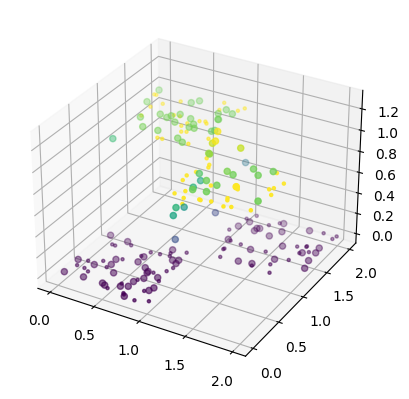

In [ ]:

#model definition
N_input=2
N_hidden=20
N_output=1

#This is the simplest network so far, just a simple perceptron

model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.ReLU(),                       # we need a hidden layer
    nn.Linear(N_hidden, N_output),
    nn.ReLU(),                       # we need non-linear activation functions
    )

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate

N_epochs=15000
loss_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)
    if epoch % 1500 == 0:                              #we will print fewer loss values
        print('epoch: ', epoch, ' loss: ', loss.item())
        loss_vals.append(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()


with torch.no_grad():
    test_output = model(test_inputs)


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(train_X1s, train_X2s, train_Ys,label="training data",c=train_Ys,marker=".")
ax.scatter(test_X1s,test_X2s,test_output,label="testing data",c=test_output,marker="o")


# Example 4 - Overfitting by undersampling

Let us consider another common issue - overfitting caused by the training set not being representative of the larger testing set.

Let us consider A cosine function:

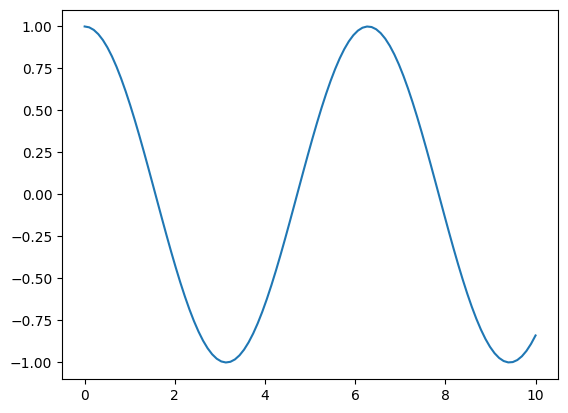

In [ ]:
cos_Xs=np.linspace(0,10,100)
cos_Ys=np.cos(cos_Xs)
plt.plot(cos_Xs,cos_Ys)

If we prepare the training data from an interval that is too small, e.g. <0,3>

In [ ]:
train_cos_Xs=np.random.rand(100)*3
train_cos_Ys=np.cos(train_cos_Xs)


#we set the parameters of our simple network architecture
N_input=1
N_hidden=15
N_output=1

#create the model based on these parameters
model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_output),
)

#convert our numpy arrays Xs and Ys into torch vectors we can use in training

inputs = torch.tensor(train_cos_Xs.reshape((100,1)), dtype=torch.float32)
targets = torch.tensor(train_cos_Ys.reshape((100,1)), dtype=torch.float32)

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate

N_epochs=5000
loss_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)
    if epoch % 500 == 0:                              #we will print fewer loss values
        print('epoch: ', epoch, ' loss: ', loss.item())
        loss_vals.append(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()

epoch:  0  loss:  1.1530941724777222
epoch:  500  loss:  0.004859963431954384
epoch:  1000  loss:  0.0009721600799821317
epoch:  1500  loss:  0.0006490621599368751
epoch:  2000  loss:  0.0005701581831090152
epoch:  2500  loss:  0.0005346730467863381
epoch:  3000  loss:  0.0005006285500712693
epoch:  3500  loss:  0.0004626257286872715
epoch:  4000  loss:  0.0004205963632557541
epoch:  4500  loss:  0.0003759078390430659


The training seems to go well, but the function we have learned is notexactly a cosine function...

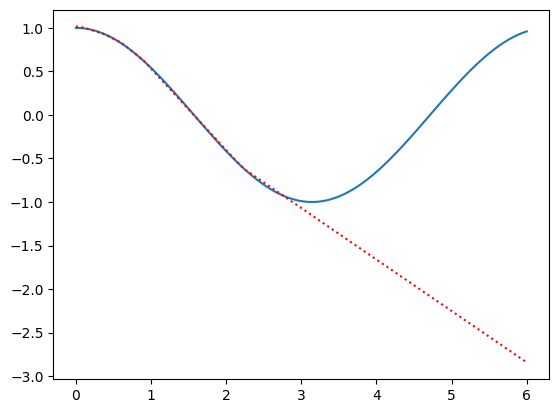

In [ ]:
val_cos_Xs=np.linspace(0,6,100)
val_cos_Ys=np.cos(val_cos_Xs)
plt.plot(val_cos_Xs,val_cos_Ys)
val_inputs=torch.tensor(val_cos_Xs.reshape((100,1)), dtype=torch.float32)
with torch.no_grad():
    val_output = model(val_inputs)
plt.plot(val_cos_Xs,val_output,"r:")

Indeed, we have fitted the part of the cosine function from 0 to 3 fairly well, but then the cosine function behaves differently...

This is why we want to use a validation dataset to aid us in seeing the overfitting when it happens. Let us combine the two pieces of code together:


epoch:  0  loss:  0.6223959922790527 validation loss:  0.5894703269004822
epoch:  500  loss:  0.0023762001655995846 validation loss:  2.039353370666504
epoch:  1000  loss:  0.0009140540496446192 validation loss:  2.1211788654327393
epoch:  1500  loss:  0.00033873695065267384 validation loss:  2.1587977409362793
epoch:  2000  loss:  0.00024934878456406295 validation loss:  2.136913537979126
epoch:  2500  loss:  0.00020894453336950392 validation loss:  2.0942890644073486
epoch:  3000  loss:  0.00016994617180898786 validation loss:  2.0463814735412598
epoch:  3500  loss:  0.00013308848429005593 validation loss:  1.9933302402496338
epoch:  4000  loss:  0.00010381994070485234 validation loss:  1.937700629234314
epoch:  4500  loss:  8.047362643992528e-05 validation loss:  1.8819066286087036


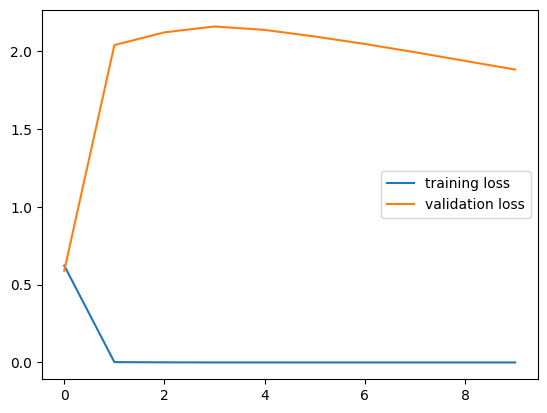

In [ ]:
# we create the training data
train_cos_Xs=np.random.rand(200)*3
train_cos_Ys=np.cos(train_cos_Xs)

# and the validation data
val_cos_Xs=np.random.rand(30)*6
val_cos_Ys=np.cos(val_cos_Xs)


#convert our numpy arrays Xs and Ys into torch vectors we can use in training

inputs = torch.tensor(train_cos_Xs.reshape((200,1)), dtype=torch.float32)
targets = torch.tensor(train_cos_Ys.reshape((200,1)), dtype=torch.float32)
val_inputs=torch.tensor(val_cos_Xs.reshape((30,1)), dtype=torch.float32)
val_targets=torch.tensor(val_cos_Ys.reshape((30,1)), dtype=torch.float32)

#we set the parameters of our simple network architecture
N_input=1
N_hidden=25
N_output=1

#create the model based on these parameters
model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_output),
)

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate

N_epochs=5000
loss_vals=[]
valid_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()

    if epoch % 500 == 0:                              #we will print fewer loss values
        loss_vals.append(loss.item())

        with torch.no_grad():
            val_output = model(val_inputs)
            val_loss=criterion(val_output,val_targets)
            valid_vals.append(val_loss.item())

        print('epoch: ', epoch, ' loss: ', loss.item(),"validation loss: ",val_loss.item())

#let us see the behavior of both training and validation loss
plt.plot(loss_vals,label="training loss")
plt.plot(valid_vals,label="validation loss")
plt.legend()

Clearly, while the training error seems to go down with training, but it is not the case for the validation error indicating that we have a severe overfitting issue.

**Exercise 2**

Can you modify the above code snippet, so that the model is fitting the data properly? Hint: we need to make sure that the training data is sampled from the range similar to the validation data...

# Exercise 2 - solution

epoch:  0  loss:  1.9339131116867065 validation loss:  1.8486381769180298
epoch:  500  loss:  0.24965143203735352 validation loss:  0.38939130306243896
epoch:  1000  loss:  0.19639235734939575 validation loss:  0.3269832730293274
epoch:  1500  loss:  0.15272323787212372 validation loss:  0.254707008600235
epoch:  2000  loss:  0.10927785187959671 validation loss:  0.17868302762508392
epoch:  2500  loss:  0.0702662393450737 validation loss:  0.10747718065977097
epoch:  3000  loss:  0.041233621537685394 validation loss:  0.05586637929081917
epoch:  3500  loss:  0.024242423474788666 validation loss:  0.028585882857441902
epoch:  4000  loss:  0.015024621039628983 validation loss:  0.015727275982499123
epoch:  4500  loss:  0.009265254251658916 validation loss:  0.009420095942914486


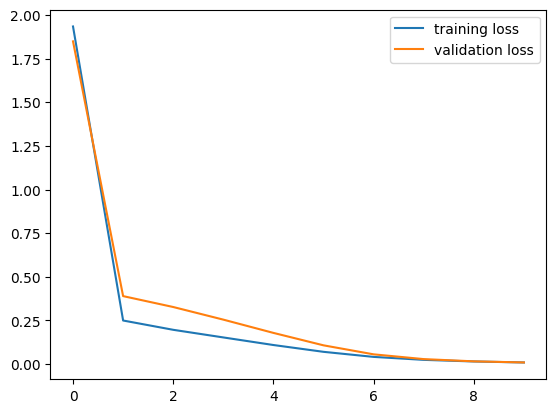

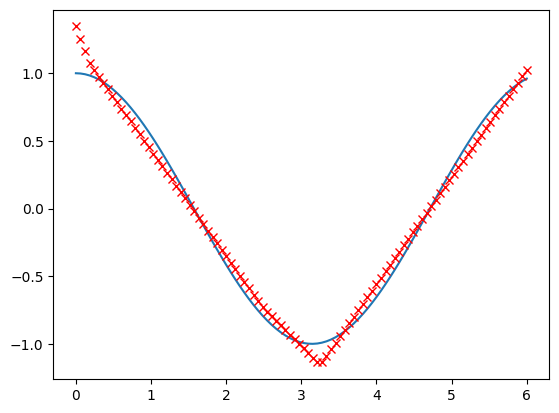

In [ ]:
# we create the training data
train_cos_Xs=np.random.rand(1000)*6
train_cos_Ys=np.cos(train_cos_Xs)

# and the validation data
val_cos_Xs=np.random.rand(30)*6
val_cos_Ys=np.cos(val_cos_Xs)

#convert our numpy arrays Xs and Ys into torch vectors we can use in training

inputs = torch.tensor(train_cos_Xs.reshape((1000,1)), dtype=torch.float32)
targets = torch.tensor(train_cos_Ys.reshape((1000,1)), dtype=torch.float32)

val_inputs=torch.tensor(val_cos_Xs.reshape((30,1)), dtype=torch.float32)
val_targets=torch.tensor(val_cos_Ys.reshape((30,1)), dtype=torch.float32)

#we set the parameters of our simple network architecture
N_input=1
N_hidden=5
N_output=1

#create the model based on these parameters
model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_output),
)

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate

N_epochs=5000
loss_vals=[]
valid_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()

    if epoch % 500 == 0:                              #we will print fewer loss values
        loss_vals.append(loss.item())

        with torch.no_grad():
            val_output = model(val_inputs)
            val_loss=criterion(val_output,val_targets)
            valid_vals.append(val_loss.item())

        print('epoch: ', epoch, ' loss: ', loss.item(),"validation loss: ",val_loss.item())

# now let us plot
plt.plot(loss_vals,label="training loss")
plt.plot(valid_vals,label="validation loss")
plt.legend()

plt.figure()

val_cos_Xs=np.linspace(0,6,100)
val_cos_Ys=np.cos(val_cos_Xs)
plt.plot(val_cos_Xs,val_cos_Ys)
val_inputs=torch.tensor(val_cos_Xs.reshape((100,1)), dtype=torch.float32)
with torch.no_grad():
    val_output = model(val_inputs)
plt.plot(val_cos_Xs,val_output,"rx")

# Example 5 - overfitting noise with large capacity network

Let us consider a relatively simple function: y=x**2-5, but now add a little noise to the samples, and let us assume that the data is expensive to generate, so we will have relatively few datapoints.

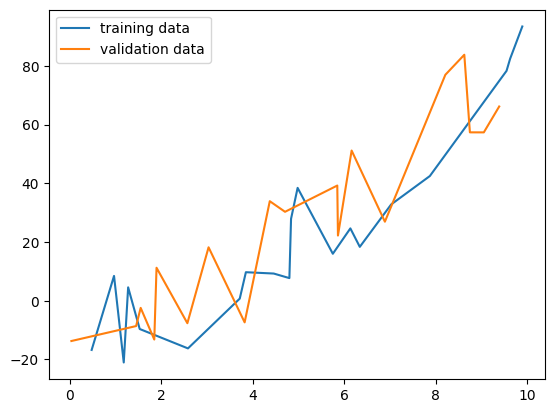

In [ ]:
# we create the training data
train_noisy_Xs=np.random.rand(20)*10
train_noisy_Xs.sort()
train_noisy_Ys=train_noisy_Xs**2-5+np.random.rand(20)*40-20 #20 is the average of the noise


# and the validation data
val_noisy_Xs=np.random.rand(20)*10
val_noisy_Xs.sort()
val_noisy_Ys=val_noisy_Xs**2-5+np.random.rand(20)*40-20

#plot what is generated

plt.plot(train_noisy_Xs,train_noisy_Ys,label="training data")
plt.plot(val_noisy_Xs,val_noisy_Ys,label="validation data")
plt.legend()


#convert our numpy arrays Xs and Ys into torch vectors we can use in training

inputs = torch.tensor(train_noisy_Xs.reshape((20,1)), dtype=torch.float32)
targets = torch.tensor(train_noisy_Ys.reshape((20,1)), dtype=torch.float32)

val_inputs=torch.tensor(val_noisy_Xs.reshape((20,1)), dtype=torch.float32)
val_targets=torch.tensor(val_noisy_Ys.reshape((20,1)), dtype=torch.float32)


Now, since we have so few datapoints, we feel that we need to compensate for what we lack in the data department by having a more complex computational model. Let us for a moment accept that this might be a good idea...

In [ ]:

#we set the parameters of our relatively complex network architecture
N_input=1
N_hidden=500
N_output=1

#create the model based on these parameters
model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_output),
)

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate

N_epochs=10000
loss_vals=[]
valid_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()

    if epoch % 1000 == 0:                              #we will print fewer loss values
        loss_vals.append(loss.item())

        with torch.no_grad():
            val_output = model(val_inputs)
            val_loss=criterion(val_output,val_targets)
            valid_vals.append(val_loss.item())

        print('epoch: ', epoch, ' loss: ', loss.item(),"validation loss: ",val_loss.item())


epoch:  0  loss:  1469.8922119140625 validation loss:  1396.449462890625
epoch:  1000  loss:  58.36589813232422 validation loss:  243.207763671875
epoch:  2000  loss:  42.70465087890625 validation loss:  295.00244140625
epoch:  3000  loss:  36.97003173828125 validation loss:  299.34649658203125
epoch:  4000  loss:  31.801015853881836 validation loss:  309.81524658203125
epoch:  5000  loss:  28.372482299804688 validation loss:  329.33087158203125
epoch:  6000  loss:  27.60593032836914 validation loss:  337.0947265625
epoch:  7000  loss:  27.392608642578125 validation loss:  327.50579833984375
epoch:  8000  loss:  27.156631469726562 validation loss:  327.452880859375
epoch:  9000  loss:  27.077938079833984 validation loss:  333.0264587402344


Clearly, there is some overfitting going on, but is it a different kind of overfitting? Let us do some plotting:

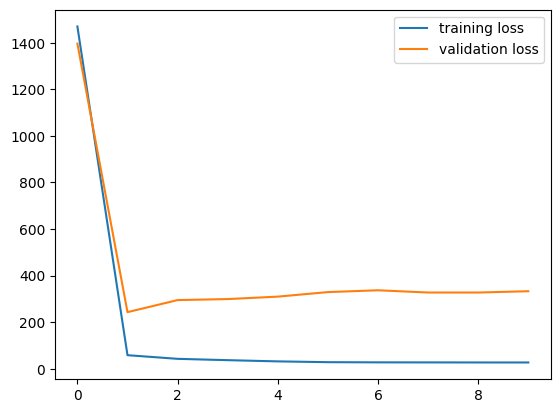

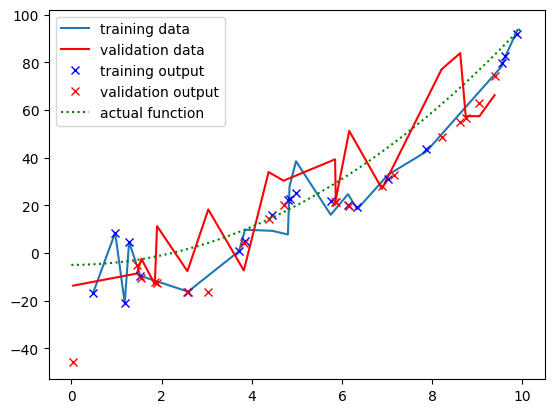

In [ ]:
plt.plot(loss_vals,label="training loss")
plt.plot(valid_vals,label="validation loss")
plt.legend()

plt.figure()

plt.plot(train_noisy_Xs,train_noisy_Ys,label="training data")
plt.plot(val_noisy_Xs,val_noisy_Ys,"r-",label="validation data")
plt.plot(inputs,y_pred.detach().numpy(),"bx",label="training output")
plt.plot(val_inputs,val_output.detach().numpy(),"rx",label="validation output")
actual_Xs=np.linspace(0,10,100)
plt.plot(actual_Xs,actual_Xs**2-5,"g:",label="actual function")
plt.legend()

Indeed, we have fitted the training data fairly well, but the presence of noise in the data (both training and validation), we can see that the model fits the blue curve better than we want it to (closer to the blue curve than to the green dots). It can be argued that this is indeed undersampling as well as in the previous example - we don't have enough data to generalize well.

In order tro fix that, we should have a relatively simpler model and train it on much more data.

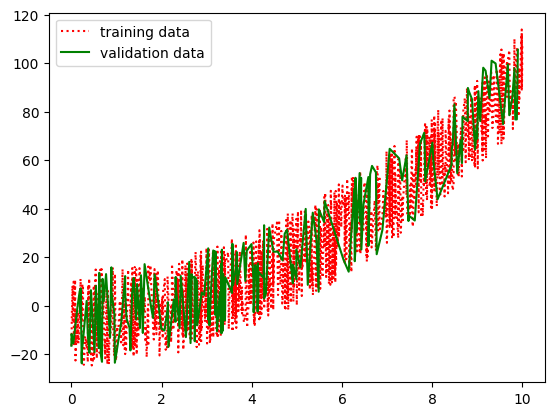

In [ ]:
#let us createlarger training data
train_noisy_Xs=np.random.rand(1000)*10
train_noisy_Xs.sort()
train_noisy_Ys=train_noisy_Xs**2-5+np.random.rand(1000)*40-20 #20 is the average of the noise


# and the validation data
val_noisy_Xs=np.random.rand(200)*10
val_noisy_Xs.sort()
val_noisy_Ys=val_noisy_Xs**2-5+np.random.rand(200)*40-20

#plot what is generated

plt.plot(train_noisy_Xs,train_noisy_Ys,"r:",label="training data")
plt.plot(val_noisy_Xs,val_noisy_Ys,"g-",label="validation data")
plt.legend()


#convert our numpy arrays Xs and Ys into torch vectors we can use in training

inputs = torch.tensor(train_noisy_Xs.reshape((1000,1)), dtype=torch.float32)
targets = torch.tensor(train_noisy_Ys.reshape((1000,1)), dtype=torch.float32)

val_inputs=torch.tensor(val_noisy_Xs.reshape((200,1)), dtype=torch.float32)
val_targets=torch.tensor(val_noisy_Ys.reshape((200,1)), dtype=torch.float32)

**Exercise 3** can you now use this data to train a simpler network (just one hidden layer with 50 neurons on this data? Does it solve the problem?

# Exercise 3 - solution

epoch:  0  loss:  1698.0811767578125 validation loss:  1480.1424560546875
epoch:  1000  loss:  191.2200164794922 validation loss:  191.2691192626953
epoch:  2000  loss:  183.98678588867188 validation loss:  187.20018005371094
epoch:  3000  loss:  167.5255584716797 validation loss:  170.77294921875
epoch:  4000  loss:  148.0111541748047 validation loss:  153.75758361816406
epoch:  5000  loss:  140.71578979492188 validation loss:  148.34506225585938
epoch:  6000  loss:  139.07601928710938 validation loss:  147.0126953125
epoch:  7000  loss:  137.93954467773438 validation loss:  146.8041229248047
epoch:  8000  loss:  137.18817138671875 validation loss:  146.39065551757812
epoch:  9000  loss:  136.6503448486328 validation loss:  145.74163818359375


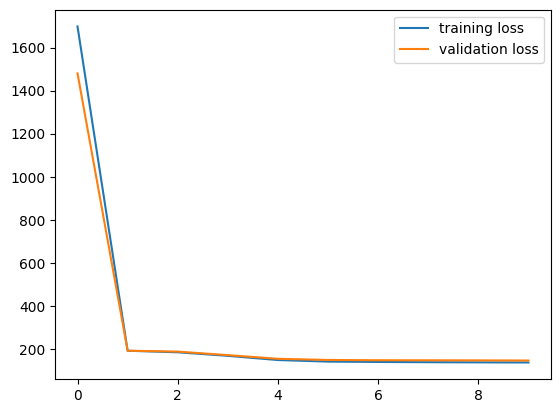

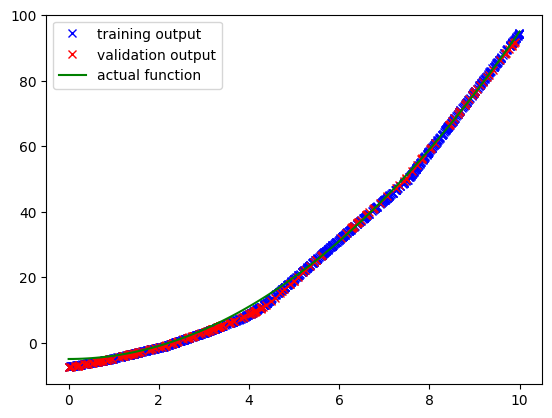

In [ ]:

#we set the simplified network
N_input=1
N_hidden=50
N_output=1

#create the model based on these parameters
model = nn.Sequential(
    nn.Linear(N_input, N_hidden),
    nn.ReLU(),
    nn.Linear(N_hidden, N_output),
)

criterion =  torch.nn.MSELoss()  # Mean Square Error

# Construct the optimizer (Now we use Adam, a bit smarter optimizer)

optimizer = torch.optim.Adam(model.parameters(), lr=0.001) # lr is the learning rate

N_epochs=10000
loss_vals=[]
valid_vals=[]

# Gradient Descent
for epoch in range(N_epochs):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(inputs)

    # Compute and print loss
    loss = criterion(y_pred, targets)

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()

    # perform a backward pass (backpropagation)
    loss.backward()

    # Update the parameters
    optimizer.step()

    if epoch % 1000 == 0:                              #we will print fewer loss values
        loss_vals.append(loss.item())

        with torch.no_grad():
            val_output = model(val_inputs)
            val_loss=criterion(val_output,val_targets)
            valid_vals.append(val_loss.item())

        print('epoch: ', epoch, ' loss: ', loss.item(),"validation loss: ",val_loss.item())

plt.plot(loss_vals,label="training loss")
plt.plot(valid_vals,label="validation loss")
plt.legend()

plt.figure()

#plt.plot(train_noisy_Xs,train_noisy_Ys,"b:",label="training data")
#plt.plot(val_noisy_Xs,val_noisy_Ys,"r:",label="validation data")
plt.plot(inputs,y_pred.detach().numpy(),"bx",label="training output")
plt.plot(val_inputs,val_output.detach().numpy(),"rx",label="validation output")
actual_Xs=np.linspace(0,10,100)
plt.plot(actual_Xs,actual_Xs**2-5,"g-",label="actual function")
plt.legend()

Even though the Loss value remains non-zero throughout the training, this is expected, as there is now noise in the training and validation data. Nonetheless, the fit to the data is relatively good.  

# Assignments for homework

As different groups at different Universities will use different scoring criteria, this might be completely optional for some of you and compulsory for some of you. It might or might not contribute to your grade. **Please consult with your instructors**

Homework assignments:

1.   Please take a look at the [PyTorch beginner tutorial](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html). We did not use the dataset and dataloader API, but this should not stop you. Choose one of the examples from today's lecture and extend it so that it uses datasets and dataloaders
2.   One more thing that you might want to consider is re-writing the training loops to use the dataloaders and minibatches as in the [pytorch tutorial](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html)
